<a href="https://colab.research.google.com/github/jpark0116/titanic/blob/main/titanic_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Importing Dataset and Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url_test = "https://raw.githubusercontent.com/jpark0116/titanic/main/test.csv"
url_train = "https://raw.githubusercontent.com/jpark0116/titanic/main/train.csv"

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)

# 2. Data Cleaning

Variables Description:  

*   **Survived** : Survival *( 0=No, 1=Yes)*
*   **Pclass** : Ticket Class
*   **Age** : Age in years
*   **SibSp** : # of siblings / spouses aboard the Titanic	
*   **Parch** : # of parents / children aboard the Titanic	
*   **Ticket** : Ticket number	
*   **Fare** : Passenger fare	
*   **Cabin** : Cabin number
*   **Embarked** : Port of Embarkation *(C = Cherbourg, Q = Queenstown, S = Southampton)*

Variable Notes:

**Pclass:** A proxy for socio-economic status (SES):
* 1 = Upper
* 2 = Middle
* 3 = Lower

**age:** 
* Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**SibSp:** 
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**Parch:** 

* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.







In [19]:
print(df_train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


There are some missing values (Age, Cabin, Embarked)

In [20]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Categorical Variables: Name, Sex, Ticket, Cabin, Embarked  
Numerical Variables: PassengerId, Survived, Pclass, SibSp, Parch, Fare

In [89]:
df_train['age_no_nan'] = df_train['Age'].dropna()
df_train['age_no_nan'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age_no_nan, dtype: float64

7.9104
14.4542
31.0


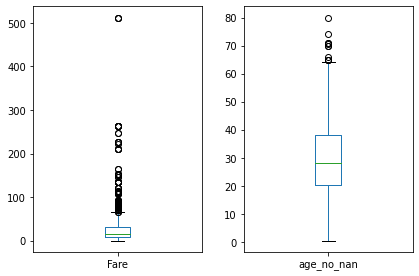

In [90]:
fig1, axes = plt.subplots(nrows = 1, ncols= 2, squeeze = False)
fig1.tight_layout()

ax1 = df_train['Fare'].plot.box(ax = axes[0,0])
ax1.set_title = 'Fare'
ax2 = df_train['age_no_nan'].plot.box(ax = axes[0,1])
ax2.set_title = 'age_no_nan'

import numpy as np
print(np.percentile(df_train['Fare'], 25))
print(np.percentile(df_train['Fare'], 50))
print(np.percentile(df_train['Fare'], 75))



In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


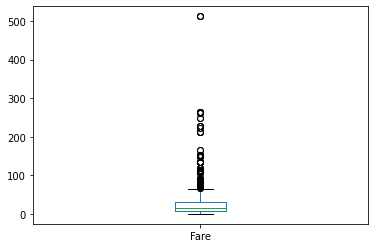

In [47]:
df_train['Fare'].plot.box()


# 3. Data Exploration

##a. General Survival Rate
More people died than survived (38.4% survival rate)

In [24]:
df_train.Survived.sum()/df_train.Survived.count()

0.3838383838383838

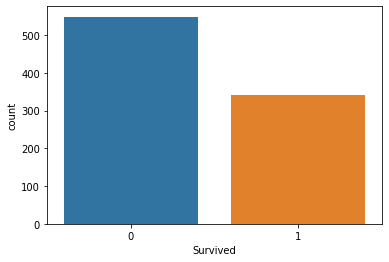

In [25]:
sns.countplot(x='Survived', data=df_train)

##b. Survival Rate by Sex
More likely to **die** *if male* (18.9% survival rate)   
More likely to **survive** *if female* (74.2% survival rate)

In [26]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
df_train_sex = df_train.groupby(['Sex'])
df_train_sex['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [28]:
df_train_sex['Survived'].sum()/df_train['Sex'].value_counts()

female    0.742038
male      0.188908
dtype: float64

In [29]:
df_train_group=df_train.groupby(['Sex','Survived'])

In [30]:
df_train_group['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

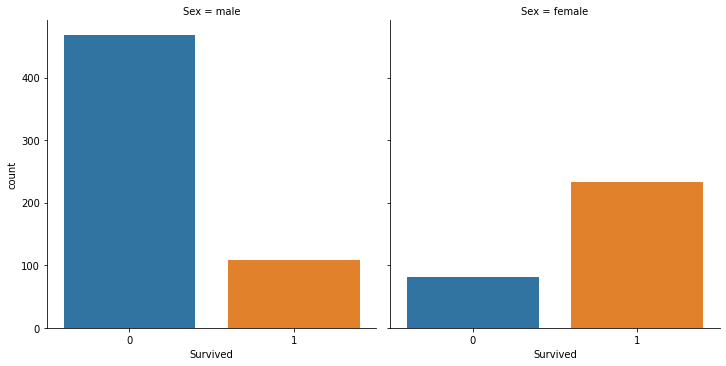

In [31]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df_train)

##c. Survival Rate by Ticket Class  
Survival Rate **increases** as ticket class **increases**. *(lower: 24%, middle: 47%, upper: 62%)*

In [32]:
df_train_Pclass = df_train.set_index('Pclass')
df_train_Pclass3 = df_train_Pclass.loc[3]
df_train_Pclass2 = df_train_Pclass.loc[2]
df_train_Pclass1 = df_train_Pclass.loc[1]
print('Lower Class Survival Rate:', df_train_Pclass3['Survived'].sum()/df_train_Pclass3['Survived'].count())
print('Middle Class Survival Rate:', df_train_Pclass2['Survived'].sum()/df_train_Pclass2['Survived'].count())
print('Upper Class Survival Rate:', df_train_Pclass1['Survived'].sum()/df_train_Pclass1['Survived'].count())

Lower Class Survival Rate: 0.24236252545824846
Middle Class Survival Rate: 0.47282608695652173
Upper Class Survival Rate: 0.6296296296296297


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


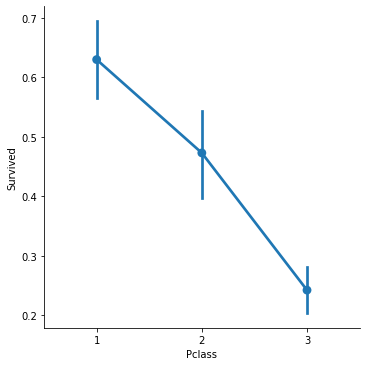

In [33]:
sns.catplot('Pclass', 'Survived', kind = 'point', data=df_train)

##d. Survival Rate with Multiple Variables

###I. Age and Ticket Class

In [34]:
pd.crosstab([df_train.Sex,df_train.Survived], df_train.Pclass, margins = True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


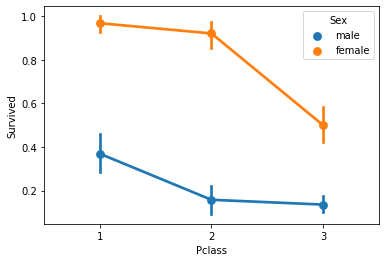

In [35]:
sns.pointplot('Pclass', 'Survived', data=df_train, hue = 'Sex')